In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
import pandas as pd
import os

file_path = "/content/bitcoin.csv.zip"
if not os.path.exists(file_path):
    print("Downloading bitcoin.csv.zip...")
    print(f"File not found at {file_path}. Please upload 'bitcoin.csv.zip' to your Colab environment or provide a direct download link.")
    raise FileNotFoundError(f"Required file '{file_path}' not found. Please upload it.")

data=pd.read_csv(file_path)

data['Timestamp']=pd.to_datetime(data['Timestamp'],unit='s')
data=data.sort_values('Timestamp')
data=data[['Timestamp','Close']]
data=data.tail(50000)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1, 1))
sequence_length=60
X, y=[],[]

for i in range(sequence_length, len(scaled_data)):
  X.append(scaled_data[i-sequence_length:i, 0])
  y.append(scaled_data[i, 0])

X, y=np.array(X), np.array(y)
X=np.reshape(X, (X.shape[0], X.shape[1], 1))

split=int(0.8*len(X))
X_train, X_test=X[:split], X[split:]
y_train, y_test=y[:split], y[split:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=5,batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 123ms/step - loss: 0.0267
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 113ms/step - loss: 0.0029
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 115ms/step - loss: 0.0022
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 116ms/step - loss: 0.0018
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - loss: 0.0013


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
predicted_prices=model.predict(X_test)
predicted_prices=scaler.inverse_transform(predicted_prices)
real_prices=scaler.inverse_transform(y_test.reshape(-1,1))
rmse=np.sqrt(mean_squared_error(real_prices,predicted_prices))
mae=mean_absolute_error(real_prices,predicted_prices)

print(f"RMSE:{rmse}")
print(f"MAE:{mae}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
RMSE:508.73958834064956
MAE:400.9142862059471


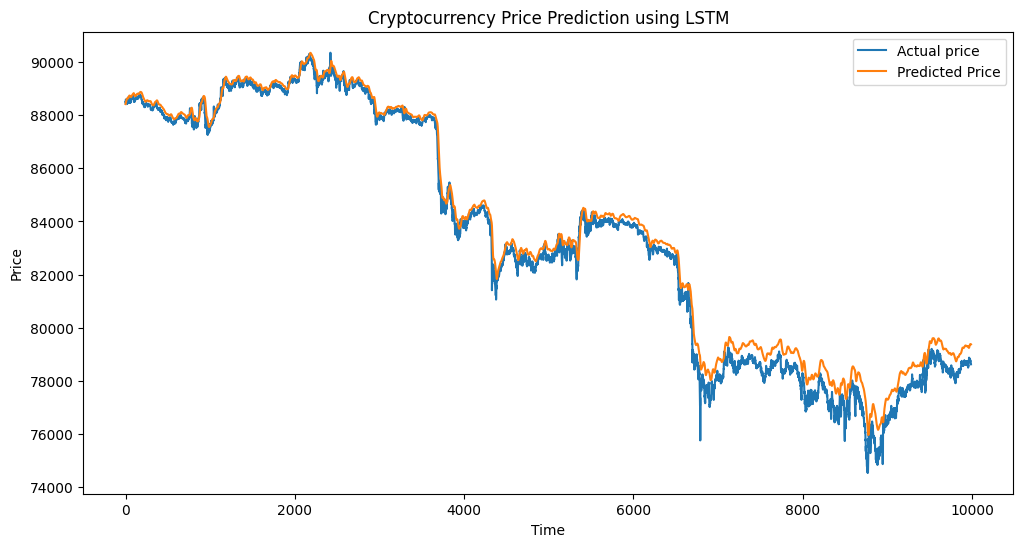

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(real_prices,label="Actual price")
plt.plot(predicted_prices,label="Predicted Price")
plt.title("Cryptocurrency Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()